In [2]:
%matplotlib inline
from pathlib import Path

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [5]:
base_path = Path("../lightning_logs")
paths = {
    "dimensions": ("dim_32", "dim_128", "dim_512"),
    "layers": ("layer_1", "layer_3", "layer_5"),
    "models": ("RNN", "GRU", "LSTM"),
    "CNN-BiLSTM": ("CNN-BiLSTM_64", "CNN-BiLSTM_128", "CNN-BiLSTM_256", "RNN", "GRU", "LSTM")
}
metrics = ("train_loss", "train_acc", "val_loss", "val_acc")
max_epoch = 30
save_dir = Path("../images")
save_dir.mkdir(parents=True, exist_ok=True)

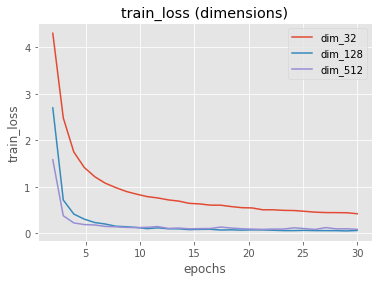

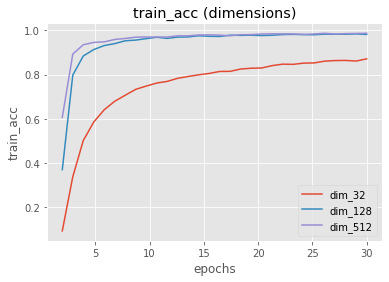

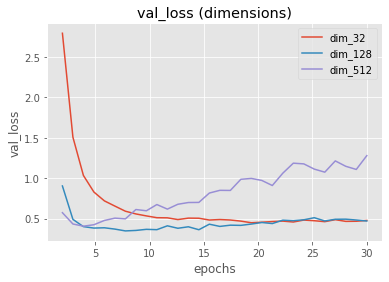

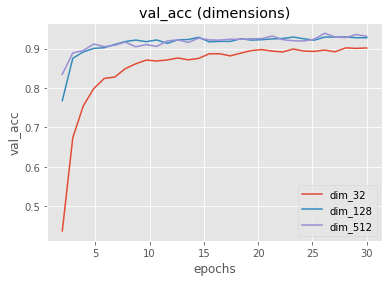

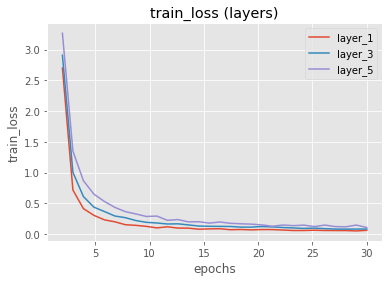

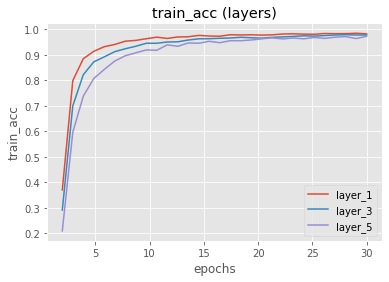

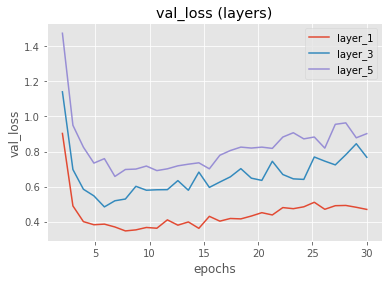

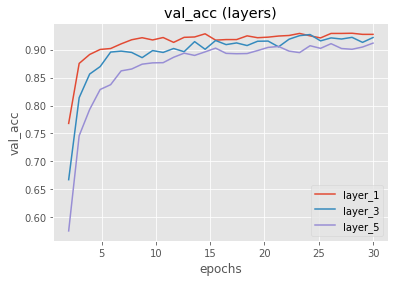

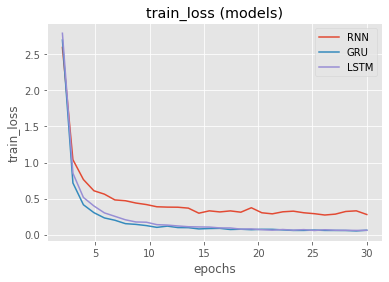

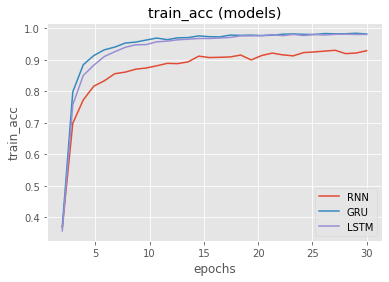

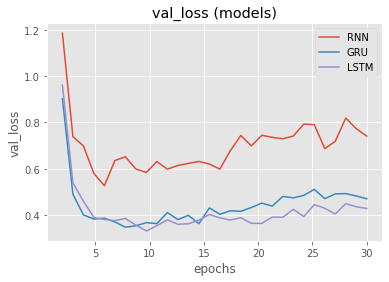

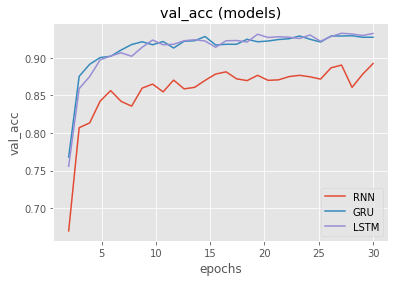

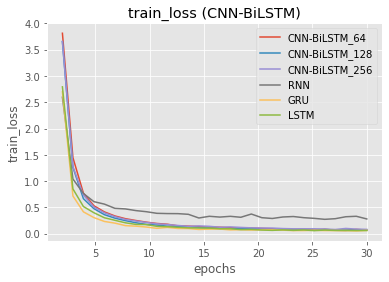

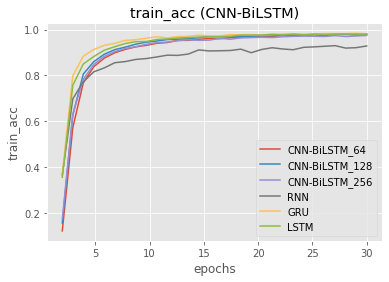

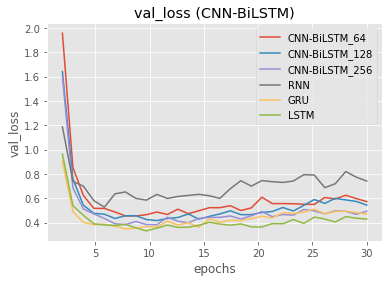

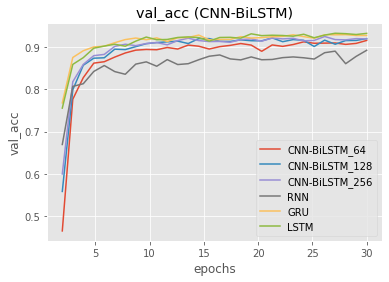

In [6]:
for path, versions in paths.items():
    graph_data = {
        metric: {}
        for metric in metrics
    }
    for version in versions:
        accumulator = EventAccumulator(base_path / f'{path}/{version}')
        accumulator.Reload()
        for metric in metrics:
            events = accumulator.Scalars(metric)
            steps = [event.step for event in events]
            max_step = max(steps)
            graph_data[metric][version] = (
                [step / max_step * (max_epoch - 1) + 1 for step in steps],
                [event.value for event in events]
            )
    for metric, data in graph_data.items():
        for version, (steps, values) in data.items():
            plt.plot(steps, values)
        plt.legend(data.keys())
        plt.xlabel("epochs")
        plt.ylabel(metric)
        plt.title(f"{metric} ({path})")
        plt.savefig(save_dir / f"{path}_{metric}.png", dpi=300, bbox_inches='tight')
        plt.show()